<div style="text-align: center;">
    <h3>Applied Data Science Project</h3>
    <h2><b>Patient Preferences Studies Classification System</b><h2>
    <h1><b>Design & Test C-Support Vector Classifier Parameters</b></h1>
    <h5>Francesco Giuseppe Gillio</h5>
    <h5>César Augusto Seminario Yrigoyen</h5>
</div>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/it/4/47/Logo_PoliTo_dal_2021_blu.png" width="250">
</div>

https://github.com/adsp-polito/2024-P8-PPS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *Drive* **Setup**

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Patient Preference Studies Binary Classifier
root = 'PPS-BC'

In [4]:
path = os.path.join('/content/drive/MyDrive', root)
if not os.path.exists(path):
    os.makedirs(path)

In [5]:
paths = {
    'input-data': f'{root}/input-data',
    'bert-embeddings': f'{root}/bert-embeddings',
    'notebook-results': f'{root}/notebook-results',
}

In [6]:
for key, value in paths.items():
    path = os.path.join('/content/drive/MyDrive', value)
    if not os.path.exists(path):
        os.makedirs(path)

**Notebook Directory Structure**
```
/PPS-BC
├── /input-data
│   ├── logs.txt
│   ├── clean-articles-2023.csv
│   ├── raw-articles-2023.csv
│   └── /cv-splits
│       ├── /k-fold-2
│       │   ├── fold-1-test.csv
│       │   ├── fold-1-train.csv
│       │   └── ...
│       ├── /k-fold-3
│       │   └── ...
│       ├── /k-fold-5
│       │   └── ...
│       └── ...
├── /bert-embeddings
│   ├── logs.txt
│   ├── /bert-base-uncased
│   │   ├── abstract-text-classification-token.pkl
│   │   ├── abstract-text-hidden-states.pkl
│   │   └── ...
│   ├── /pubmedbert-base-embeddings
│   │   └── ...
│   ├── /S-PubMedBert-MS-MARCO
│   │   └── ...
│   └── ...
└── /notebook-results
    ├── ...
    └── /support-vector-params
        ├── /BiomedNLP-BiomedBERT-base-uncased-abstract
        │   └── ...
        └── /pubmedbert-base-embeddings
            └── ...
```

# **Design & Test** *C-Support Vector Classifier* **Parameters** for **BiomedNLP-BiomedBERT-base-uncased-abstract**

## **Design & Test** *C-Support Vector Classifier* **Parameters**

**Requirements**

In [7]:
import os
import numpy as np
import pandas as pd

from typing import Dict, List, Tuple, Union

In [8]:
from sklearn.svm import SVC

In [9]:
from itertools import product
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    fbeta_score,
    roc_auc_score,
    average_precision_score,
    log_loss,
    brier_score_loss
)

In [10]:
np.random.seed(42)

In [11]:
device = 'cpu'
device

'cpu'

In [12]:
input = f"/content/drive/MyDrive/{paths['input-data']}"

In [13]:
branch = os.path.join(f"/content/drive/MyDrive/{paths['notebook-results']}", 'support-vector-params')
if not os.path.exists(branch):
    os.makedirs(branch)

*BiomedNLP-BiomedBERT-base-uncased-abstract*

In [14]:
output = os.path.join(branch, 'BiomedNLP-BiomedBERT-base-uncased-abstract')
if not os.path.exists(output):
    os.makedirs(output)

In [15]:
with open(os.path.join(output, 'logs.txt'), 'w') as file:
    pass

**BERT-Base Model:** *BiomedNLP-BiomedBERT-base-uncased-abstract*

In [16]:
model = os.path.join(f"/content/drive/MyDrive/{paths['bert-embeddings']}", 'BiomedNLP-BiomedBERT-base-uncased-abstract')

**T&A Link:** *vector-weighted-average-2080-hidden-states*

In [17]:
link = 'vector-weighted-average-2080-hidden-states.pkl'

**C-Support Vector Classifier Parameters**

In [18]:
params = {
    'C': [
        1e0, 1e1, 1e2
    ],
    'gamma': [
        1e-5, 1e-4, 1e-3,
        'auto', 'scale'
    ]
}

**Evaluation Metrics**

In [19]:
def compute(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    y_prob: np.ndarray
) -> Dict[str, float]:
    """
    compute classification metrics for predictions

    args:
        y_true (np.ndarray): ground truth labels for the test set
        y_pred (np.ndarray): predictions for the test set
        y_prob (np.ndarray): probabilities for the positive class

    returns:
        Dict[str, float]: a dictionary with classification metrics
    """
    metrics = {
        'F2-PPS': fbeta_score(
            y_true, y_pred, beta=2, pos_label=1
        ),  # F2-Score (Class 1)
        'F1-PPS': f1_score(
            y_true, y_pred, pos_label=1
        ),  # F1-Score (Class 1)

        'TPR': recall_score(
            y_true, y_pred, pos_label=1
        ),  # True Positive Rate (TPR)
        'FNR': 1 - recall_score(
            y_true, y_pred, pos_label=1
        ),  # False Negative Rate (FNR)
        'PPV': precision_score(
            y_true, y_pred, pos_label=1
        ),  # Positive Predictive Value (PPV)
        'FDR': 1 - precision_score(
            y_true, y_pred, pos_label=1
        ),  # False Discovery Rate (FDR)

        'AUC-PR': average_precision_score(
            y_true, y_prob
        ),  # Area Under Precision-Recall Curve (AUC-PR)
        'BA': balanced_accuracy_score(
            y_true, y_pred
        ),  # Balanced Accuracy (BA)
        'AUC-ROC': roc_auc_score(
            y_true, y_prob
        ),  # Area Under ROC Curve (AUC-ROC)

        'G-Mean': np.sqrt(
            recall_score(
                y_true, y_pred, pos_label=1
            ) *
            recall_score(
                y_true, y_pred, pos_label=0
            )
        ),  # Geometric Mean (G-Mean)
        'MCC': matthews_corrcoef(
            y_true, y_pred
        ),  # Matthews Correlation Coefficient (MCC)

        'Log-Loss': log_loss(
            y_true, y_prob
        ),  # Log-Loss
        'BS': brier_score_loss(
            y_true, y_prob
        ),  # Brier Score

        'TNR': recall_score(
            y_true, y_pred, pos_label=0
        ),  # True Negative Rate (TNR)
        'FPR': 1 - recall_score(
            y_true, y_pred, pos_label=0
        ),  # False Positive Rate (FPR)
        'NPV': precision_score(
            y_true, y_pred, pos_label=0
        ),  # Negative Predictive Value (NPV)
        'FOR': 1 - precision_score(
            y_true, y_pred, pos_label=0
        ),  # False Omission Rate (FOR)

        'Accuracy': accuracy_score(
            y_true, y_pred
        ),  # Accuracy
        'Weighted F1-Score': f1_score(
            y_true, y_pred, average='weighted'
        ),  # Weighted F1-Score
        'Weighted Precision': precision_score(
            y_true, y_pred, average='weighted'
        ),  # Weighted Precision
        'Weighted Recall': recall_score(
            y_true, y_pred, average='weighted'
        ),  # Weighted Recall
        'Macro F1-Score': f1_score(
            y_true, y_pred, average='macro'
        ),  # Macro F1-Score
        'Macro Precision': precision_score(
            y_true, y_pred, average='macro'
        ),  # Macro Precision
        'Macro Recall': recall_score(
            y_true, y_pred, average='macro'
        )   # Macro Recall
    }
    return metrics

*Evaluation Metrics Sorting Criteria*

In [20]:
order = [
    'F2-PPS', # F2-Score (Class 1 - Patient Preference Studies)
    'F1-PPS', # F1-Score (Class 1 - Patient Preference Studies)
    'TPR',    # True Positive Rate
    'PPV',    # Positive Predictive Value
    'AUC-PR', # Area Under Precision-Recall Curve
    'BA',     # Balanced Accuracy
    'AUC-ROC' # Area Under ROC Curve
]

**Binary Classification**

In [21]:
def evaluate(
    dir: str,
    loc: str,
    case: str,
    input: str,
    output: str,
    params: Dict[str, List[Union[Tuple[int, ...], str]]],
    order: List[str]
) -> pd.DataFrame:
    """
    evaluate support vector classifier parameters for class prediction

    args:
        dir (str): path to the directory with bert-base model
        loc (str): path to file with title-abstract link (.pkl file)
        case (str): cross-validation case identifier (e.g. 'k-fold-2' or 'k-fold-3')
        input (str): path to the input folder with data and splits
        output (str): path to output folder to store logs
        params (Dict[str, List[Union[Tuple[int, ...], str]]]): a dictionary of params
        order (List[str]): evaluation metrics sorting criteria

    returns:
        pd.DataFrame: DataFrame with evaluation results
    """

    def add(
        by: str,
        to: str
    ) -> pd.DataFrame:
        """
        add an embeddings column to the input split file

        args:
            by (str): path to the .pkl file with embeddings
            to (str): path to the .csv split file
        """
        dataset = pd.read_pickle(by)
        frame = pd.read_csv(to)
        embeddings = [
            column for column in dataset.columns
            if column not in ['title', 'abstract', 'label']
        ]
        data = frame.merge(
            dataset[['title', 'abstract', 'label'] + embeddings],
            on=['title', 'abstract', 'label'],
            how='left'
        )
        return data

    def collect(
        dir: str
    ) -> List[Tuple[str, str]]:
        """
        collect train and test file pairs from the directory

        args:
            dir (str): path to the directory with train/test files

        returns:
            List[Tuple[str, str]]: list of (train file, test file) tuples
        """
        files = {'train': [], 'test': []}
        for idx, _, walk in os.walk(dir):
            for file in walk:
                if file.endswith('.csv'):
                    if 'train' in file:
                        files['train'].append(
                            os.path.join(idx, file)
                        )
                    elif 'test' in file:
                        files['test'].append(
                            os.path.join(idx, file)
                        )
        files['train'].sort()
        files['test'].sort()
        return list(zip(files['train'], files['test']))

    log = f'\n{case}\n'
    with open(os.path.join(output, 'logs.txt'), 'a') as file:
        file.write(log + '\n')
    print(log)
    combinations = [
        {'C': x,
         'gamma': y}
        for x, y in product(
             params['C'],
             params['gamma']
        )
    ]
    results = list()
    for params in combinations:
        log = f'-' * 50 + '\n' + f'C-Support Vector Classifier Parameters: {params}\n' + f'-' * 50 + '\n'
        with open(os.path.join(output, 'logs.txt'), 'a') as file:
            file.write(log + '\n')
        print(log)
        averages = {}
        route = os.path.join(input, 'cv-splits', case)
        for files in collect(route):
            log = f'classifier execution on:\n- train file: {os.path.basename(files[0])}\n- test file: {os.path.basename(files[1])}'
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
            embeddings = os.path.join(dir, loc)
            data_train = add(
                by=embeddings,
                to=files[0]
            )
            data_test = add(
                by=embeddings,
                to=files[1]
            )
            y_train = data_train['label']
            y_test = np.array(data_test['label'].tolist())
            # skip non-embedding columns
            column = [
                column for column in data_train.columns
                if column not in ['label', 'title', 'abstract']
            ][0]
            if not isinstance(data_train[column].values[0], np.ndarray):
                # debug
                print(f'WARNING: {column} not of type np.ndarray')
                continue
            x_train = np.array(data_train[column].tolist())
            x_test = np.array(data_test[column].tolist())
            try:
                svm = SVC(
                    kernel="rbf",
                    probability=True,
                    class_weight="balanced",
                    random_state=42,
                    max_iter=1000,
                    **params
                )
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('classifier', svm)
                ])
                # train
                pipeline.fit(x_train, y_train)
                # test
                y_pred = pipeline.predict(x_test)
                y_prob = pipeline.predict_proba(x_test)
                metrics = compute(
                    y_true=y_test,
                    y_pred=y_pred,
                    y_prob=y_prob[:, 1]
                )
                log = f"F2-PPS: {metrics['F2-PPS']}"
                with open(os.path.join(output, 'logs.txt'), 'a') as file:
                    file.write(log + '\n')
                print(log)
                log = f"F1-PPS: {metrics['F1-PPS']}"
                with open(os.path.join(output, 'logs.txt'), 'a') as file:
                    file.write(log + '\n')
                print(log)
                log = f"TPR: {metrics['TPR']}"
                with open(os.path.join(output, 'logs.txt'), 'a') as file:
                    file.write(log + '\n')
                print(log)
                log = f"PPV: {metrics['PPV']}"
                with open(os.path.join(output, 'logs.txt'), 'a') as file:
                    file.write(log + '\n')
                print(log)
            except Exception as e:
                # debug
                print(f'ERROR for {column}: {e}')
                continue
            if str(params) not in averages:
                averages[str(params)] = {
                    key: [] for key in metrics
                }
            for key, value in metrics.items():
                averages[str(params)][key].append(value)
        for param, scores in averages.items():
            mean = {
                key: np.mean(values)
                for key, values in scores.items()
            }
            results.append({
                'Support Vector Parameters': param,
                **mean
            })
            log = f"\nF2-PPS: {mean['F2-PPS']}"
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
            log = f"F1-PPS: {mean['F1-PPS']}"
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
            log = f"TPR: {mean['TPR']}"
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
            log = f"PPV: {mean['PPV']}"
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
    data = pd.DataFrame(results)
    data = data.sort_values(
        by=order,
        ascending=[False] * len(order)
    )
    return data

*Fibonacci Sequence:* **[2, 3, 5, 8, 13, 21]**

Splits: **[2 + 3 + 21]** & **[5 + 8 + 13]**

*Split into 2 blocks of 26 iterations for* **M** *configurations, with* **M = 15** *parameter combinations*

*Computational effort per split:* **Mx26 = 15x26=390** *iterations on* **1.215** *data points each*

In [22]:
for seed in [2, 3, 21]:
    print('-' * 50)
    print(f'seed: {seed}\n' + '-' * 50)
    results = evaluate(
        dir = model,
        loc = link,
        case = f'k-fold-{seed}',
        input = input,
        output = output,
        params = params,
        order = order
    )
    results.to_csv(os.path.join(output, f'k-fold-{seed}-results.csv'), index=False)

--------------------------------------------------
seed: 2
--------------------------------------------------

k-fold-2

--------------------------------------------------
C-Support Vector Classifier Parameters: {'C': 1.0, 'gamma': 1e-05}
--------------------------------------------------

classifier execution on:
- train file: fold-1-train.csv
- test file: fold-1-test.csv
F2-PPS: 0.8409785932721713
F1-PPS: 0.7119741100323624
TPR: 0.9565217391304348
PPV: 0.5670103092783505
classifier execution on:
- train file: fold-2-train.csv
- test file: fold-2-test.csv
F2-PPS: 0.7360742705570292
F1-PPS: 0.5388349514563107
TPR: 0.9736842105263158
PPV: 0.3724832214765101

F2-PPS: 0.7885264319146003
F1-PPS: 0.6254045307443366
TPR: 0.9651029748283753
PPV: 0.4697467653774303
--------------------------------------------------
C-Support Vector Classifier Parameters: {'C': 1.0, 'gamma': 0.0001}
--------------------------------------------------

classifier execution on:
- train file: fold-1-train.csv
- tes

In [23]:
for seed in [5, 8, 13]:
    print('-' * 50)
    print(f'seed: {seed}\n' + '-' * 50)
    results = evaluate(
        dir = model,
        loc = link,
        case = f'k-fold-{seed}',
        input = input,
        output = output,
        params = params,
        order = order
    )
    results.to_csv(os.path.join(output, f'k-fold-{seed}-results.csv'), index=False)

--------------------------------------------------
seed: 5
--------------------------------------------------

k-fold-5

--------------------------------------------------
C-Support Vector Classifier Parameters: {'C': 1.0, 'gamma': 1e-05}
--------------------------------------------------

classifier execution on:
- train file: fold-1-train.csv
- test file: fold-1-test.csv
F2-PPS: 0.8723404255319149
F1-PPS: 0.82
TPR: 0.9111111111111111
PPV: 0.7454545454545455
classifier execution on:
- train file: fold-2-train.csv
- test file: fold-2-test.csv
F2-PPS: 0.8677685950413223
F1-PPS: 0.8076923076923077
TPR: 0.9130434782608695
PPV: 0.7241379310344828
classifier execution on:
- train file: fold-3-train.csv
- test file: fold-3-test.csv
F2-PPS: 0.8677685950413223
F1-PPS: 0.8076923076923077
TPR: 0.9130434782608695
PPV: 0.7241379310344828
classifier execution on:
- train file: fold-4-train.csv
- test file: fold-4-test.csv
F2-PPS: 0.9053497942386831
F1-PPS: 0.8380952380952381
TPR: 0.9565217391304348

## *Statistical* **Data Analysis**

**Requirements**

In [24]:
import os
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Dict

In [25]:
np.random.seed(42)

In [26]:
device = 'cpu'
device

'cpu'

In [27]:
branch = os.path.join(f"/content/drive/MyDrive/{paths['notebook-results']}", 'support-vector-params')

In [28]:
output = os.path.join(branch, 'BiomedNLP-BiomedBERT-base-uncased-abstract')

*Evaluation Metrics Sorting Criteria*

In [29]:
order = [
    'F2-PPS', # F2-Score (Class 1 - Patient Preference Studies)
    'F1-PPS', # F1-Score (Class 1 - Patient Preference Studies)
    'TPR',    # True Positive Rate
    'PPV',    # Positive Predictive Value
    'AUC-PR', # Area Under Precision-Recall Curve
    'BA',     # Balanced Accuracy
    'AUC-ROC' # Area Under ROC Curve
]

In [30]:
def combine(
    dir: str,
    main: List[str],
    order: List[str]
) -> pd.DataFrame:
    """
    combine multiple .csv files into a single DataFrame

    args:
        dir (str): path to the folder with .csv files
        main (List[str]): main group-by columns
        order (List[str]): evaluation metrics sorting criteria

    returns:
        pd.DataFrame: DataFrame with scores
    """
    files = glob.glob(os.path.join(dir, "*.csv"))
    data = list()
    for file in files:
        frame = pd.read_csv(file)
        data.append(frame)
    concat = pd.concat(data)
    data = (
        concat.groupby(main)
        .agg(
            ['mean', 'std']
        )
        .reset_index()
    )
    data.columns = [
        '-'.join(column).strip('-') for column in data.columns
        if column not in main
    ]
    for column in data.columns:
        if column.endswith('-mean'):
            base = column.rsplit('-', 1)[0]
            deviation = f'{base}-std'
            if deviation in data.columns:
                # compute confidence interval
                N = len(concat.groupby(main))
                sem = data[deviation] / np.sqrt(N)
                deg = N - 1
                # 99% confidence level
                critical = stats.t.ppf(0.995, deg)
                lower = data[column] - critical * sem
                upper = data[column] + critical * sem
                data[f'{base}-ci'] = (
                    data[column].round(3).astype(str) + " ± " +
                    ((upper - lower) / 2).round(3).astype(str)
                )
    data = data.sort_values(
        by=[f"{metric}-mean" for metric in order],
        ascending=[False] * len(order)
    )
    columns = [
        column for column in data.columns
        if column.endswith('-ci')
    ]
    data = data[main + columns]
    data.columns = [
        column.replace('-ci', '') for column in data.columns
    ]
    return data

In [31]:
def get(
    data: pd.DataFrame,
    case: str,
    order: List[str]
) -> pd.DataFrame:
    """
    get a dataframe by group-by on input column

    args:
        data (pd.DataFrame): DataFrame with evaluation results
        case (str): group-by column to plot (e.g., 'BERT-Base Model')
        order (List[str]): evaluation metrics sorting criteria

    returns:
        pd.DataFrame: DataFrame with scores
    """
    data = data[[case] + order].copy()
    for metric in order:
        data[metric] = data[metric].str.extract(r'(\d+\.\d+)').astype(float)
    res = (
        data.groupby(case)
        .agg(
            ['mean', 'std']
        )
        .reset_index()
    )
    res.columns = [
        '-'.join(column).strip('-') for column in res.columns
        if column not in [case]
    ]
    for column in res.columns:
        if column.endswith('-mean'):
            base = column.rsplit('-', 1)[0]
            deviation = f'{base}-std'
            if deviation in res.columns:
                # compute confidence interval
                N = len(data.groupby([case]))
                sem = res[deviation] / np.sqrt(N)
                deg = N - 1
                # 99% confidence level
                critical = stats.t.ppf(0.995, deg)
                lower = res[column] - critical * sem
                upper = res[column] + critical * sem
                res[f'{base}-ci'] = (
                    res[column].round(3).astype(str) + " ± " +
                    ((upper - lower) / 2).round(3).astype(str)
                )
    res = res.sort_values(
        by=[f"{metric}-mean" for metric in order],
        ascending=[False] * len(order)
    )
    columns = [
        column for column in res.columns
        if column.endswith('-ci')
    ]
    res = res[[case] + columns]
    res.columns = [
        column.replace('-ci', '') for column in res.columns
    ]
    return res

In [32]:
def plot(
    data: pd.DataFrame,
    column: str,
    output: str,
    order: List[str]
) -> None:
    """
    plot performance metrics with confidence intervals

    args:
        data (pd.DataFrame): DataFrame with evaluation results
        column (str): group-by column to plot (e.g., 'BERT-Base Model')
        output (str): path to output folder to store plot
        order (List[str]): evaluation metrics sorting criteria
    """
    chart = list()
    for metric in order:
        if metric in data.columns:
            for _, row in data.iterrows():
                ci = row[metric].split(' ± ')
                mean = float(ci[0])
                error = float(ci[1])
                chart.append({
                    column: row[column],
                    'Metric': metric,
                    'Mean': mean,
                    'Error': error
                })
    chart = pd.DataFrame(chart)
    chart[column] = chart[column].astype(str)
    plt.figure(figsize=(16, 9))
    position = -0.75
    ax = sns.barplot(
        chart,
        x=column,
        y='Mean',
        hue='Metric',
        ci=None,
        palette='crest'
    )
    for bar, (_, row) in zip(ax.patches, chart.iterrows()):
        center = bar.get_x() + bar.get_width() / 2
        lower = row['Mean'] - row['Error']
        upper = row['Mean'] + row['Error']
        plt.errorbar(
            x=center,
            y=row['Mean'],
            yerr=row['Error'],
            fmt='none',
            color='black',
            linestyle='-',
            linewidth=0.5
        )
    for idx, metric in enumerate(chart['Metric'].unique()):
        columns = chart[chart['Metric'] == metric]
        row = columns.loc[columns['Mean'].idxmax()]
        value = row['Mean']
        center = (
            ax.patches[
                chart.index.get_loc(row.name)
            ].get_x() +
            ax.patches[
                chart.index.get_loc(row.name)
            ].get_width() / 2
        )
        if metric == 'F2-PPS':
            ax.plot(
                [center, position],
                [value, value],
                color='black',
                linestyle='--',
                linewidth=0.5
            )
            ax.text(
                x=position,
                y=value,
                s=f'{value:.3f}',
                ha='right',
                va='center',
                fontsize=10
            )
    plt.title(
        f'{column} Performance Distributions',
        fontsize=15
    )
    plt.xlabel(
        column,
        fontsize=10
    )
    plt.ylabel(
        'Metric Value',
        fontsize=10
    )
    plt.legend(
        title=f'Metric',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha="right",
        rotation_mode='anchor'
    )
    plt.ylim(
        bottom=min(
            chart['Mean'] - chart['Error']
        )
    )
    plt.tight_layout()
    plt.savefig(
        f'{output}/{column.lower().replace(" ", "-")}-performance-plot.png',
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()

**Global** *Statistical Data Analysis*

In [33]:
results = combine(
    dir = output,
    main = ['Support Vector Parameters'],
    order = order
)
results.head()

,Support Vector Parameters,F2-PPS,F1-PPS,TPR,FNR,PPV,FDR,AUC-PR,BA,AUC-ROC,...,FPR,NPV,FOR,Accuracy,Weighted F1-Score,Weighted Precision,Weighted Recall,Macro F1-Score,Macro Precision,Macro Recall
0,"{'C': 1.0, 'gamma': 'auto'}",0.912 ± 0.004,0.916 ± 0.004,0.909 ± 0.005,0.091 ± 0.005,0.926 ± 0.006,0.074 ± 0.006,0.965 ± 0.001,0.946 ± 0.003,0.99 ± 0.0,...,0.017 ± 0.002,0.979 ± 0.001,0.021 ± 0.001,0.969 ± 0.002,0.969 ± 0.002,0.969 ± 0.002,0.969 ± 0.002,0.949 ± 0.003,0.952 ± 0.003,0.946 ± 0.003
1,"{'C': 1.0, 'gamma': 'scale'}",0.912 ± 0.004,0.916 ± 0.004,0.909 ± 0.005,0.091 ± 0.005,0.926 ± 0.006,0.074 ± 0.006,0.965 ± 0.001,0.946 ± 0.003,0.99 ± 0.0,...,0.017 ± 0.002,0.979 ± 0.001,0.021 ± 0.001,0.969 ± 0.002,0.969 ± 0.002,0.969 ± 0.002,0.969 ± 0.002,0.949 ± 0.003,0.952 ± 0.003,0.946 ± 0.003
3,"{'C': 1.0, 'gamma': 0.001}",0.911 ± 0.004,0.911 ± 0.004,0.911 ± 0.005,0.089 ± 0.005,0.912 ± 0.005,0.088 ± 0.005,0.963 ± 0.001,0.945 ± 0.003,0.989 ± 0.0,...,0.021 ± 0.001,0.98 ± 0.001,0.02 ± 0.001,0.967 ± 0.001,0.967 ± 0.001,0.967 ± 0.002,0.967 ± 0.001,0.945 ± 0.002,0.946 ± 0.003,0.945 ± 0.003
7,"{'C': 10.0, 'gamma': 0.0001}",0.909 ± 0.004,0.893 ± 0.006,0.921 ± 0.003,0.079 ± 0.003,0.87 ± 0.01,0.13 ± 0.01,0.96 ± 0.002,0.944 ± 0.003,0.989 ± 0.0,...,0.033 ± 0.003,0.982 ± 0.001,0.018 ± 0.001,0.958 ± 0.003,0.959 ± 0.003,0.961 ± 0.002,0.958 ± 0.003,0.934 ± 0.004,0.926 ± 0.005,0.944 ± 0.003
8,"{'C': 10.0, 'gamma': 0.001}",0.908 ± 0.005,0.924 ± 0.004,0.899 ± 0.006,0.101 ± 0.006,0.954 ± 0.004,0.046 ± 0.004,0.972 ± 0.002,0.944 ± 0.003,0.992 ± 0.001,...,0.01 ± 0.001,0.977 ± 0.001,0.023 ± 0.001,0.973 ± 0.001,0.972 ± 0.001,0.973 ± 0.001,0.973 ± 0.001,0.954 ± 0.002,0.965 ± 0.002,0.944 ± 0.003


In [34]:
results.to_csv(os.path.join(output, f'ranks.csv'), encoding='utf-8', index=False)

**Local** *Statistical Data Analysis* - **by C-Support Vector Classifier Parameters**

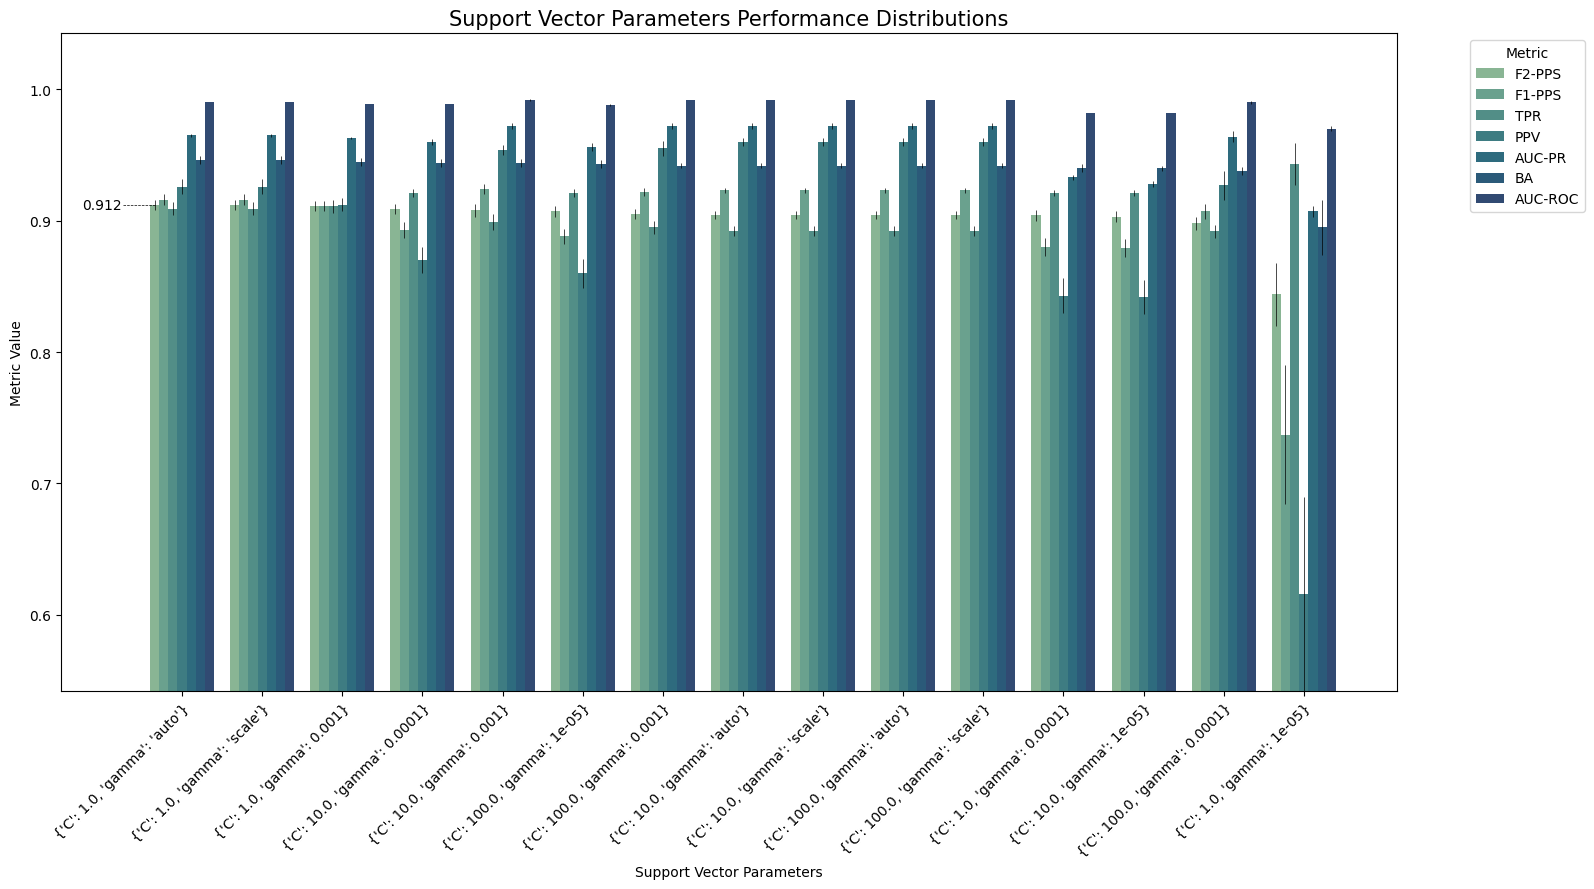

In [35]:
frame = results[['Support Vector Parameters'] + order].copy()

plot(frame, 'Support Vector Parameters', output, order)

*What to* **Move Forward**

In [36]:
def select(
    dir: str,
    title: str,
    column: str,
    output: str,
    main: List[str],
    order: List[str],
    model: Dict[str, str] = None
) -> pd.DataFrame:
    """
    what to move forward

    args:
        dir (str): path to the folder with .csv file
        title (str): plot title
        column (str): group-by column to plot (e.g., 'BERT-Base Model')
        output (str): path to output folder to store plot
        main (List[str]): main group-by columns
        order (List[str]): evaluation metrics sorting criteria
        model (Dict[str, str], optional): dictionary with {'BERT-Base Model': 'bert-base model'} to filter

    returns:
        pd.DataFrame: DataFrame with scores
    """
    data = pd.read_csv(dir)
    data = data[main + order]
    if model:
        key, value = next(iter(model.items()))
        data = data[data[key] == value]
    def lower(value):
        base, error = map(float, value.split(' ± '))
        return base - error
    for metric in order:
        data[metric] = data[metric].apply(lower)
    data = data.sort_values(
        by=order,
        ascending=[False] * len(order)
    )
    data.to_csv(os.path.join(output, f'{title.lower().replace(" ", "-")}-ranks.csv'), encoding='utf-8', index=False)
    chart = []
    for metric in order:
        if metric in data.columns:
            for _, row in data.iterrows():
                mean = float(row[metric])
                chart.append({
                    column: row[column],
                    'Metric': metric,
                    'Mean': mean
                })
    chart = pd.DataFrame(chart)
    chart[column] = chart[column].astype(str)
    plt.figure(figsize=(16, 9))
    position = -0.75
    ax = sns.barplot(
        chart,
        x=column,
        y='Mean',
        hue='Metric',
        palette='crest'
    )
    for idx, metric in enumerate(chart['Metric'].unique()):
        columns = chart[chart['Metric'] == metric]
        row = columns.loc[columns['Mean'].idxmax()]
        value = row['Mean']
        center = (
            ax.patches[
                chart.index.get_loc(row.name)
            ].get_x() +
            ax.patches[
                chart.index.get_loc(row.name)
            ].get_width() / 2
        )
        if metric == 'F2-PPS':
            ax.plot(
                [center, position],
                [value, value],
                color='black',
                linestyle='--',
                linewidth=0.5
            )
            ax.text(
                x=position,
                y=value,
                s=f'{value:.3f}',
                ha='right',
                va='center',
                fontsize=10
            )
    plt.title(
        f'{title} Performance Distributions',
        fontsize=15
    )
    plt.xlabel(
        column,
        fontsize=10
    )
    plt.ylabel(
        'Metric Value',
        fontsize=10
    )
    plt.legend(
        title=f'Metric',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha="right",
        rotation_mode='anchor'
    )
    plt.ylim(
        bottom=min(
            chart['Mean']
        )
    )
    plt.tight_layout()
    plt.savefig(
        f'{output}/{title.lower().replace(" ", "-")}-performance-plot.png',
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()
    return data

* Select the **C-Support Vector Classifier Parameters** with the *highest performance at the lower bound of the confidence interval*

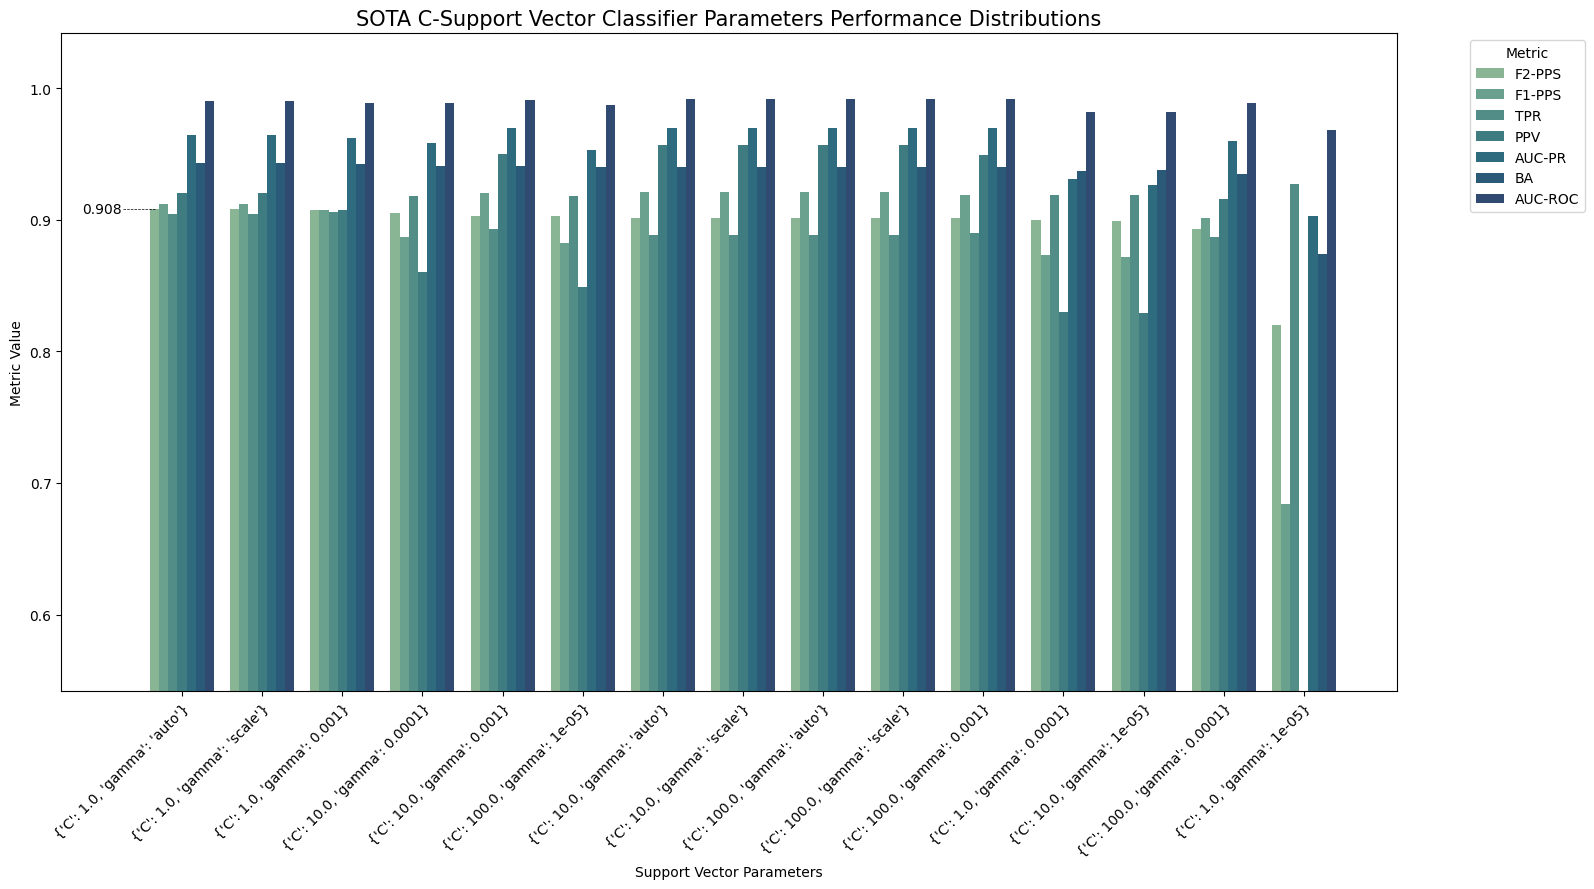

In [37]:
base = select(
    dir = os.path.join(output, f'ranks.csv'),
    title = "SOTA C-Support Vector Classifier Parameters",
    column = 'Support Vector Parameters',
    output = output,
    main = ['Support Vector Parameters'],
    order = order,
    model = None
)

# **Design & Test** *C-Support Vector Classifier* **Parameters** for **pubmedbert-base-embeddings**

## **Design & Test** *C-Support Vector Classifier* **Parameters**

**Requirements**

In [38]:
import os
import numpy as np
import pandas as pd

from typing import Dict, List, Tuple, Union

In [39]:
from sklearn.svm import SVC

In [40]:
from itertools import product
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    fbeta_score,
    roc_auc_score,
    average_precision_score,
    log_loss,
    brier_score_loss
)

In [41]:
np.random.seed(42)

In [42]:
device = 'cpu'
device

'cpu'

In [43]:
input = f"/content/drive/MyDrive/{paths['input-data']}"

In [44]:
branch = os.path.join(f"/content/drive/MyDrive/{paths['notebook-results']}", 'support-vector-params')
if not os.path.exists(branch):
    os.makedirs(branch)

*pubmedbert-base-embeddings*

In [45]:
output = os.path.join(branch, 'pubmedbert-base-embeddings')
if not os.path.exists(output):
    os.makedirs(output)

In [46]:
with open(os.path.join(output, 'logs.txt'), 'w') as file:
    pass

**BERT-Base Model:** *pubmedbert-base-embeddings*

In [47]:
model = os.path.join(f"/content/drive/MyDrive/{paths['bert-embeddings']}", 'pubmedbert-base-embeddings')

**T&A Link:** *vector-concatenation-classification-token*

In [48]:
link = 'vector-concatenation-classification-token.pkl'

**C-Support Vector Classifier Parameters**

In [49]:
params = {
    'C': [
        1e0, 1e1, 1e2
    ],
    'gamma': [
        1e-5, 1e-4, 1e-3,
        'auto', 'scale'
    ]
}

**Evaluation Metrics**

In [50]:
def compute(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    y_prob: np.ndarray
) -> Dict[str, float]:
    """
    compute classification metrics for predictions

    args:
        y_true (np.ndarray): ground truth labels for the test set
        y_pred (np.ndarray): predictions for the test set
        y_prob (np.ndarray): probabilities for the positive class

    returns:
        Dict[str, float]: a dictionary with classification metrics
    """
    metrics = {
        'F2-PPS': fbeta_score(
            y_true, y_pred, beta=2, pos_label=1
        ),  # F2-Score (Class 1)
        'F1-PPS': f1_score(
            y_true, y_pred, pos_label=1
        ),  # F1-Score (Class 1)

        'TPR': recall_score(
            y_true, y_pred, pos_label=1
        ),  # True Positive Rate (TPR)
        'FNR': 1 - recall_score(
            y_true, y_pred, pos_label=1
        ),  # False Negative Rate (FNR)
        'PPV': precision_score(
            y_true, y_pred, pos_label=1
        ),  # Positive Predictive Value (PPV)
        'FDR': 1 - precision_score(
            y_true, y_pred, pos_label=1
        ),  # False Discovery Rate (FDR)

        'AUC-PR': average_precision_score(
            y_true, y_prob
        ),  # Area Under Precision-Recall Curve (AUC-PR)
        'BA': balanced_accuracy_score(
            y_true, y_pred
        ),  # Balanced Accuracy (BA)
        'AUC-ROC': roc_auc_score(
            y_true, y_prob
        ),  # Area Under ROC Curve (AUC-ROC)

        'G-Mean': np.sqrt(
            recall_score(
                y_true, y_pred, pos_label=1
            ) *
            recall_score(
                y_true, y_pred, pos_label=0
            )
        ),  # Geometric Mean (G-Mean)
        'MCC': matthews_corrcoef(
            y_true, y_pred
        ),  # Matthews Correlation Coefficient (MCC)

        'Log-Loss': log_loss(
            y_true, y_prob
        ),  # Log-Loss
        'BS': brier_score_loss(
            y_true, y_prob
        ),  # Brier Score

        'TNR': recall_score(
            y_true, y_pred, pos_label=0
        ),  # True Negative Rate (TNR)
        'FPR': 1 - recall_score(
            y_true, y_pred, pos_label=0
        ),  # False Positive Rate (FPR)
        'NPV': precision_score(
            y_true, y_pred, pos_label=0
        ),  # Negative Predictive Value (NPV)
        'FOR': 1 - precision_score(
            y_true, y_pred, pos_label=0
        ),  # False Omission Rate (FOR)

        'Accuracy': accuracy_score(
            y_true, y_pred
        ),  # Accuracy
        'Weighted F1-Score': f1_score(
            y_true, y_pred, average='weighted'
        ),  # Weighted F1-Score
        'Weighted Precision': precision_score(
            y_true, y_pred, average='weighted'
        ),  # Weighted Precision
        'Weighted Recall': recall_score(
            y_true, y_pred, average='weighted'
        ),  # Weighted Recall
        'Macro F1-Score': f1_score(
            y_true, y_pred, average='macro'
        ),  # Macro F1-Score
        'Macro Precision': precision_score(
            y_true, y_pred, average='macro'
        ),  # Macro Precision
        'Macro Recall': recall_score(
            y_true, y_pred, average='macro'
        )   # Macro Recall
    }
    return metrics

*Evaluation Metrics Sorting Criteria*

In [51]:
order = [
    'F2-PPS', # F2-Score (Class 1 - Patient Preference Studies)
    'F1-PPS', # F1-Score (Class 1 - Patient Preference Studies)
    'TPR',    # True Positive Rate
    'PPV',    # Positive Predictive Value
    'AUC-PR', # Area Under Precision-Recall Curve
    'BA',     # Balanced Accuracy
    'AUC-ROC' # Area Under ROC Curve
]

**Binary Classification**

In [52]:
def evaluate(
    dir: str,
    loc: str,
    case: str,
    input: str,
    output: str,
    params: Dict[str, List[Union[Tuple[int, ...], str]]],
    order: List[str]
) -> pd.DataFrame:
    """
    evaluate support vector classifier parameters for class prediction

    args:
        dir (str): path to the directory with bert-base model
        loc (str): path to file with title-abstract link (.pkl file)
        case (str): cross-validation case identifier (e.g. 'k-fold-2' or 'k-fold-3')
        input (str): path to the input folder with data and splits
        output (str): path to output folder to store logs
        params (Dict[str, List[Union[Tuple[int, ...], str]]]): a dictionary of params
        order (List[str]): evaluation metrics sorting criteria

    returns:
        pd.DataFrame: DataFrame with evaluation results
    """

    def add(
        by: str,
        to: str
    ) -> pd.DataFrame:
        """
        add an embeddings column to the input split file

        args:
            by (str): path to the .pkl file with embeddings
            to (str): path to the .csv split file
        """
        dataset = pd.read_pickle(by)
        frame = pd.read_csv(to)
        embeddings = [
            column for column in dataset.columns
            if column not in ['title', 'abstract', 'label']
        ]
        data = frame.merge(
            dataset[['title', 'abstract', 'label'] + embeddings],
            on=['title', 'abstract', 'label'],
            how='left'
        )
        return data

    def collect(
        dir: str
    ) -> List[Tuple[str, str]]:
        """
        collect train and test file pairs from the directory

        args:
            dir (str): path to the directory with train/test files

        returns:
            List[Tuple[str, str]]: list of (train file, test file) tuples
        """
        files = {'train': [], 'test': []}
        for idx, _, walk in os.walk(dir):
            for file in walk:
                if file.endswith('.csv'):
                    if 'train' in file:
                        files['train'].append(
                            os.path.join(idx, file)
                        )
                    elif 'test' in file:
                        files['test'].append(
                            os.path.join(idx, file)
                        )
        files['train'].sort()
        files['test'].sort()
        return list(zip(files['train'], files['test']))

    log = f'\n{case}\n'
    with open(os.path.join(output, 'logs.txt'), 'a') as file:
        file.write(log + '\n')
    print(log)
    combinations = [
        {'C': x,
         'gamma': y}
        for x, y in product(
             params['C'],
             params['gamma']
        )
    ]
    results = list()
    for params in combinations:
        log = f'-' * 50 + '\n' + f'C-Support Vector Classifier Parameters: {params}\n' + f'-' * 50 + '\n'
        with open(os.path.join(output, 'logs.txt'), 'a') as file:
            file.write(log + '\n')
        print(log)
        averages = {}
        route = os.path.join(input, 'cv-splits', case)
        for files in collect(route):
            log = f'classifier execution on:\n- train file: {os.path.basename(files[0])}\n- test file: {os.path.basename(files[1])}'
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
            embeddings = os.path.join(dir, loc)
            data_train = add(
                by=embeddings,
                to=files[0]
            )
            data_test = add(
                by=embeddings,
                to=files[1]
            )
            y_train = data_train['label']
            y_test = np.array(data_test['label'].tolist())
            # skip non-embedding columns
            column = [
                column for column in data_train.columns
                if column not in ['label', 'title', 'abstract']
            ][0]
            if not isinstance(data_train[column].values[0], np.ndarray):
                # debug
                print(f'WARNING: {column} not of type np.ndarray')
                continue
            x_train = np.array(data_train[column].tolist())
            x_test = np.array(data_test[column].tolist())
            try:
                svm = SVC(
                    kernel="rbf",
                    probability=True,
                    class_weight="balanced",
                    random_state=42,
                    max_iter=1000,
                    **params
                )
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('classifier', svm)
                ])
                # train
                pipeline.fit(x_train, y_train)
                # test
                y_pred = pipeline.predict(x_test)
                y_prob = pipeline.predict_proba(x_test)
                metrics = compute(
                    y_true=y_test,
                    y_pred=y_pred,
                    y_prob=y_prob[:, 1]
                )
                log = f"F2-PPS: {metrics['F2-PPS']}"
                with open(os.path.join(output, 'logs.txt'), 'a') as file:
                    file.write(log + '\n')
                print(log)
                log = f"F1-PPS: {metrics['F1-PPS']}"
                with open(os.path.join(output, 'logs.txt'), 'a') as file:
                    file.write(log + '\n')
                print(log)
                log = f"TPR: {metrics['TPR']}"
                with open(os.path.join(output, 'logs.txt'), 'a') as file:
                    file.write(log + '\n')
                print(log)
                log = f"PPV: {metrics['PPV']}"
                with open(os.path.join(output, 'logs.txt'), 'a') as file:
                    file.write(log + '\n')
                print(log)
            except Exception as e:
                # debug
                print(f'ERROR for {column}: {e}')
                continue
            if str(params) not in averages:
                averages[str(params)] = {
                    key: [] for key in metrics
                }
            for key, value in metrics.items():
                averages[str(params)][key].append(value)
        for param, scores in averages.items():
            mean = {
                key: np.mean(values)
                for key, values in scores.items()
            }
            results.append({
                'Support Vector Parameters': param,
                **mean
            })
            log = f"\nF2-PPS: {mean['F2-PPS']}"
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
            log = f"F1-PPS: {mean['F1-PPS']}"
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
            log = f"TPR: {mean['TPR']}"
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
            log = f"PPV: {mean['PPV']}"
            with open(os.path.join(output, 'logs.txt'), 'a') as file:
                file.write(log + '\n')
            print(log)
    data = pd.DataFrame(results)
    data = data.sort_values(
        by=order,
        ascending=[False] * len(order)
    )
    return data

*Fibonacci Sequence:* **[2, 3, 5, 8, 13, 21]**

Splits: **[2 + 3 + 21]** & **[5 + 8 + 13]**

*Split into 2 blocks of 26 iterations for* **M** *configurations, with* **M = 15** *parameter combinations*

*Computational effort per split:* **Mx26 = 15x26=390** *iterations on* **1.215** *data points each*

In [53]:
for seed in [2, 3, 21]:
    print('-' * 50)
    print(f'seed: {seed}\n' + '-' * 50)
    results = evaluate(
        dir = model,
        loc = link,
        case = f'k-fold-{seed}',
        input = input,
        output = output,
        params = params,
        order = order
    )
    results.to_csv(os.path.join(output, f'k-fold-{seed}-results.csv'), index=False)

--------------------------------------------------
seed: 2
--------------------------------------------------

k-fold-2

--------------------------------------------------
C-Support Vector Classifier Parameters: {'C': 1.0, 'gamma': 1e-05}
--------------------------------------------------

classifier execution on:
- train file: fold-1-train.csv
- test file: fold-1-test.csv
F2-PPS: 0.8656957928802589
F1-PPS: 0.7838827838827839
TPR: 0.9304347826086956
PPV: 0.6772151898734177
classifier execution on:
- train file: fold-2-train.csv
- test file: fold-2-test.csv
F2-PPS: 0.867430441898527
F1-PPS: 0.7881040892193308
TPR: 0.9298245614035088
PPV: 0.6838709677419355

F2-PPS: 0.866563117389393
F1-PPS: 0.7859934365510574
TPR: 0.9301296720061022
PPV: 0.6805430788076765
--------------------------------------------------
C-Support Vector Classifier Parameters: {'C': 1.0, 'gamma': 0.0001}
--------------------------------------------------

classifier execution on:
- train file: fold-1-train.csv
- test 

In [54]:
for seed in [5, 8, 13]:
    print('-' * 50)
    print(f'seed: {seed}\n' + '-' * 50)
    results = evaluate(
        dir = model,
        loc = link,
        case = f'k-fold-{seed}',
        input = input,
        output = output,
        params = params,
        order = order
    )
    results.to_csv(os.path.join(output, f'k-fold-{seed}-results.csv'), index=False)

--------------------------------------------------
seed: 5
--------------------------------------------------

k-fold-5

--------------------------------------------------
C-Support Vector Classifier Parameters: {'C': 1.0, 'gamma': 1e-05}
--------------------------------------------------

classifier execution on:
- train file: fold-1-train.csv
- test file: fold-1-test.csv
F2-PPS: 0.8771929824561403
F1-PPS: 0.8602150537634409
TPR: 0.8888888888888888
PPV: 0.8333333333333334
classifier execution on:
- train file: fold-2-train.csv
- test file: fold-2-test.csv
F2-PPS: 0.8906882591093117
F1-PPS: 0.8073394495412844
TPR: 0.9565217391304348
PPV: 0.6984126984126984
classifier execution on:
- train file: fold-3-train.csv
- test file: fold-3-test.csv
F2-PPS: 0.9183673469387755
F1-PPS: 0.8411214953271028
TPR: 0.9782608695652174
PPV: 0.7377049180327869
classifier execution on:
- train file: fold-4-train.csv
- test file: fold-4-test.csv
F2-PPS: 0.8641975308641975
F1-PPS: 0.8
TPR: 0.9130434782608695


## *Statistical* **Data Analysis**

**Requirements**

In [55]:
import os
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Dict

In [56]:
np.random.seed(42)

In [57]:
device = 'cpu'
device

'cpu'

In [58]:
branch = os.path.join(f"/content/drive/MyDrive/{paths['notebook-results']}", 'support-vector-params')

In [59]:
output = os.path.join(branch, 'pubmedbert-base-embeddings')

*Evaluation Metrics Sorting Criteria*

In [60]:
order = [
    'F2-PPS', # F2-Score (Class 1 - Patient Preference Studies)
    'F1-PPS', # F1-Score (Class 1 - Patient Preference Studies)
    'TPR',    # True Positive Rate
    'PPV',    # Positive Predictive Value
    'AUC-PR', # Area Under Precision-Recall Curve
    'BA',     # Balanced Accuracy
    'AUC-ROC' # Area Under ROC Curve
]

In [61]:
def combine(
    dir: str,
    main: List[str],
    order: List[str]
) -> pd.DataFrame:
    """
    combine multiple .csv files into a single DataFrame

    args:
        dir (str): path to the folder with .csv files
        main (List[str]): main group-by columns
        order (List[str]): evaluation metrics sorting criteria

    returns:
        pd.DataFrame: DataFrame with scores
    """
    files = glob.glob(os.path.join(dir, "*.csv"))
    data = list()
    for file in files:
        frame = pd.read_csv(file)
        data.append(frame)
    concat = pd.concat(data)
    data = (
        concat.groupby(main)
        .agg(
            ['mean', 'std']
        )
        .reset_index()
    )
    data.columns = [
        '-'.join(column).strip('-') for column in data.columns
        if column not in main
    ]
    for column in data.columns:
        if column.endswith('-mean'):
            base = column.rsplit('-', 1)[0]
            deviation = f'{base}-std'
            if deviation in data.columns:
                # compute confidence interval
                N = len(concat.groupby(main))
                sem = data[deviation] / np.sqrt(N)
                deg = N - 1
                # 99% confidence level
                critical = stats.t.ppf(0.995, deg)
                lower = data[column] - critical * sem
                upper = data[column] + critical * sem
                data[f'{base}-ci'] = (
                    data[column].round(3).astype(str) + " ± " +
                    ((upper - lower) / 2).round(3).astype(str)
                )
    data = data.sort_values(
        by=[f"{metric}-mean" for metric in order],
        ascending=[False] * len(order)
    )
    columns = [
        column for column in data.columns
        if column.endswith('-ci')
    ]
    data = data[main + columns]
    data.columns = [
        column.replace('-ci', '') for column in data.columns
    ]
    return data

In [62]:
def get(
    data: pd.DataFrame,
    case: str,
    order: List[str]
) -> pd.DataFrame:
    """
    get a dataframe by group-by on input column

    args:
        data (pd.DataFrame): DataFrame with evaluation results
        case (str): group-by column to plot (e.g., 'BERT-Base Model')
        order (List[str]): evaluation metrics sorting criteria

    returns:
        pd.DataFrame: DataFrame with scores
    """
    data = data[[case] + order].copy()
    for metric in order:
        data[metric] = data[metric].str.extract(r'(\d+\.\d+)').astype(float)
    res = (
        data.groupby(case)
        .agg(
            ['mean', 'std']
        )
        .reset_index()
    )
    res.columns = [
        '-'.join(column).strip('-') for column in res.columns
        if column not in [case]
    ]
    for column in res.columns:
        if column.endswith('-mean'):
            base = column.rsplit('-', 1)[0]
            deviation = f'{base}-std'
            if deviation in res.columns:
                # compute confidence interval
                N = len(data.groupby([case]))
                sem = res[deviation] / np.sqrt(N)
                deg = N - 1
                # 99% confidence level
                critical = stats.t.ppf(0.995, deg)
                lower = res[column] - critical * sem
                upper = res[column] + critical * sem
                res[f'{base}-ci'] = (
                    res[column].round(3).astype(str) + " ± " +
                    ((upper - lower) / 2).round(3).astype(str)
                )
    res = res.sort_values(
        by=[f"{metric}-mean" for metric in order],
        ascending=[False] * len(order)
    )
    columns = [
        column for column in res.columns
        if column.endswith('-ci')
    ]
    res = res[[case] + columns]
    res.columns = [
        column.replace('-ci', '') for column in res.columns
    ]
    return res

In [63]:
def plot(
    data: pd.DataFrame,
    column: str,
    output: str,
    order: List[str]
) -> None:
    """
    plot performance metrics with confidence intervals

    args:
        data (pd.DataFrame): DataFrame with evaluation results
        column (str): group-by column to plot (e.g., 'BERT-Base Model')
        output (str): path to output folder to store plot
        order (List[str]): evaluation metrics sorting criteria
    """
    chart = list()
    for metric in order:
        if metric in data.columns:
            for _, row in data.iterrows():
                ci = row[metric].split(' ± ')
                mean = float(ci[0])
                error = float(ci[1])
                chart.append({
                    column: row[column],
                    'Metric': metric,
                    'Mean': mean,
                    'Error': error
                })
    chart = pd.DataFrame(chart)
    chart[column] = chart[column].astype(str)
    plt.figure(figsize=(16, 9))
    position = -0.75
    ax = sns.barplot(
        chart,
        x=column,
        y='Mean',
        hue='Metric',
        ci=None,
        palette='crest'
    )
    for bar, (_, row) in zip(ax.patches, chart.iterrows()):
        center = bar.get_x() + bar.get_width() / 2
        lower = row['Mean'] - row['Error']
        upper = row['Mean'] + row['Error']
        plt.errorbar(
            x=center,
            y=row['Mean'],
            yerr=row['Error'],
            fmt='none',
            color='black',
            linestyle='-',
            linewidth=0.5
        )
    for idx, metric in enumerate(chart['Metric'].unique()):
        columns = chart[chart['Metric'] == metric]
        row = columns.loc[columns['Mean'].idxmax()]
        value = row['Mean']
        center = (
            ax.patches[
                chart.index.get_loc(row.name)
            ].get_x() +
            ax.patches[
                chart.index.get_loc(row.name)
            ].get_width() / 2
        )
        if metric == 'F2-PPS':
            ax.plot(
                [center, position],
                [value, value],
                color='black',
                linestyle='--',
                linewidth=0.5
            )
            ax.text(
                x=position,
                y=value,
                s=f'{value:.3f}',
                ha='right',
                va='center',
                fontsize=10
            )
    plt.title(
        f'{column} Performance Distributions',
        fontsize=15
    )
    plt.xlabel(
        column,
        fontsize=10
    )
    plt.ylabel(
        'Metric Value',
        fontsize=10
    )
    plt.legend(
        title=f'Metric',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha="right",
        rotation_mode='anchor'
    )
    plt.ylim(
        bottom=min(
            chart['Mean'] - chart['Error']
        )
    )
    plt.tight_layout()
    plt.savefig(
        f'{output}/{column.lower().replace(" ", "-")}-performance-plot.png',
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()

**Global** *Statistical Data Analysis*

In [64]:
results = combine(
    dir = output,
    main = ['Support Vector Parameters'],
    order = order
)
results.head()

,Support Vector Parameters,F2-PPS,F1-PPS,TPR,FNR,PPV,FDR,AUC-PR,BA,AUC-ROC,...,FPR,NPV,FOR,Accuracy,Weighted F1-Score,Weighted Precision,Weighted Recall,Macro F1-Score,Macro Precision,Macro Recall
9,"{'C': 10.0, 'gamma': 1e-05}",0.903 ± 0.003,0.879 ± 0.005,0.921 ± 0.003,0.079 ± 0.003,0.843 ± 0.009,0.157 ± 0.009,0.951 ± 0.003,0.94 ± 0.002,0.981 ± 0.001,...,0.041 ± 0.002,0.981 ± 0.001,0.019 ± 0.001,0.952 ± 0.002,0.953 ± 0.002,0.955 ± 0.002,0.952 ± 0.002,0.924 ± 0.003,0.912 ± 0.004,0.94 ± 0.002
2,"{'C': 1.0, 'gamma': 0.0001}",0.901 ± 0.003,0.879 ± 0.004,0.917 ± 0.004,0.083 ± 0.004,0.846 ± 0.007,0.154 ± 0.007,0.952 ± 0.004,0.939 ± 0.002,0.981 ± 0.001,...,0.04 ± 0.002,0.98 ± 0.001,0.02 ± 0.001,0.952 ± 0.002,0.953 ± 0.002,0.955 ± 0.002,0.952 ± 0.002,0.924 ± 0.003,0.913 ± 0.004,0.939 ± 0.002
7,"{'C': 10.0, 'gamma': 0.0001}",0.899 ± 0.007,0.9 ± 0.008,0.899 ± 0.007,0.101 ± 0.007,0.905 ± 0.013,0.095 ± 0.013,0.961 ± 0.004,0.938 ± 0.004,0.987 ± 0.002,...,0.023 ± 0.003,0.977 ± 0.002,0.023 ± 0.002,0.962 ± 0.003,0.962 ± 0.003,0.963 ± 0.003,0.962 ± 0.003,0.939 ± 0.005,0.941 ± 0.007,0.938 ± 0.004
14,"{'C': 100.0, 'gamma': 1e-05}",0.898 ± 0.005,0.893 ± 0.006,0.901 ± 0.006,0.099 ± 0.006,0.889 ± 0.011,0.111 ± 0.011,0.956 ± 0.004,0.937 ± 0.003,0.986 ± 0.002,...,0.027 ± 0.002,0.977 ± 0.001,0.023 ± 0.001,0.959 ± 0.002,0.96 ± 0.002,0.96 ± 0.003,0.959 ± 0.002,0.934 ± 0.004,0.933 ± 0.006,0.937 ± 0.003
0,"{'C': 1.0, 'gamma': 'auto'}",0.888 ± 0.006,0.901 ± 0.004,0.88 ± 0.007,0.12 ± 0.007,0.926 ± 0.005,0.074 ± 0.005,0.962 ± 0.004,0.932 ± 0.004,0.986 ± 0.002,...,0.017 ± 0.001,0.973 ± 0.002,0.027 ± 0.002,0.964 ± 0.001,0.963 ± 0.001,0.964 ± 0.002,0.964 ± 0.001,0.94 ± 0.002,0.949 ± 0.003,0.932 ± 0.004


In [65]:
results.to_csv(os.path.join(output, f'ranks.csv'), encoding='utf-8', index=False)

**Local** *Statistical Data Analysis* - **by C-Support Vector Classifier Parameters**

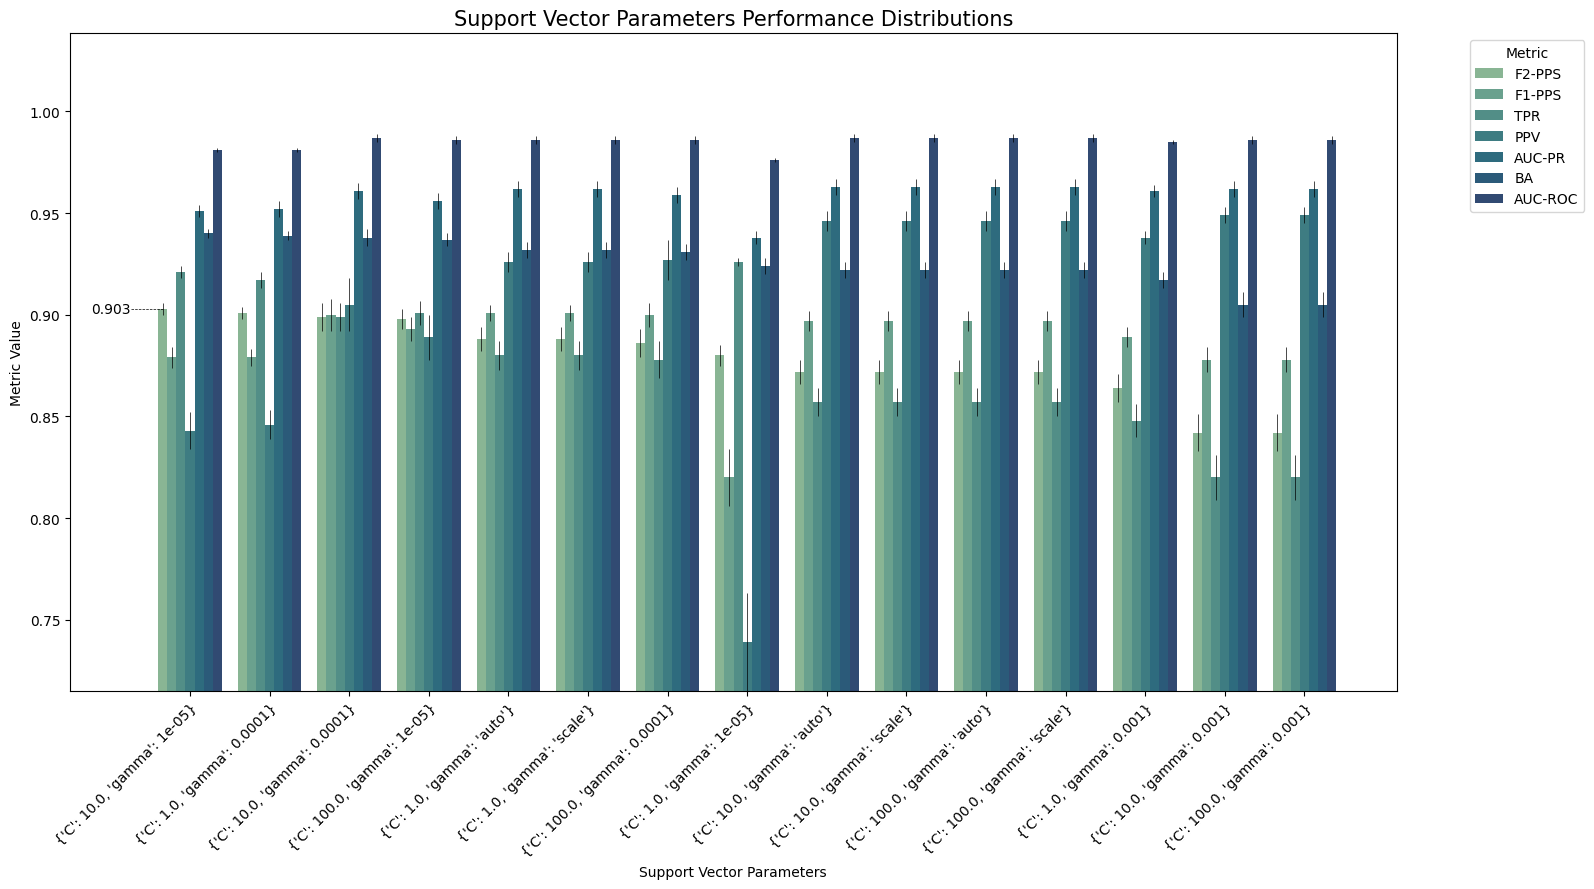

In [66]:
frame = results[['Support Vector Parameters'] + order].copy()

plot(frame, 'Support Vector Parameters', output, order)

*What to* **Move Forward**

In [67]:
def select(
    dir: str,
    title: str,
    column: str,
    output: str,
    main: List[str],
    order: List[str],
    model: Dict[str, str] = None
) -> pd.DataFrame:
    """
    what to move forward

    args:
        dir (str): path to the folder with .csv file
        title (str): plot title
        column (str): group-by column to plot (e.g., 'BERT-Base Model')
        output (str): path to output folder to store plot
        main (List[str]): main group-by columns
        order (List[str]): evaluation metrics sorting criteria
        model (Dict[str, str], optional): dictionary with {'BERT-Base Model': 'bert-base model'} to filter

    returns:
        pd.DataFrame: DataFrame with scores
    """
    data = pd.read_csv(dir)
    data = data[main + order]
    if model:
        key, value = next(iter(model.items()))
        data = data[data[key] == value]
    def lower(value):
        base, error = map(float, value.split(' ± '))
        return base - error
    for metric in order:
        data[metric] = data[metric].apply(lower)
    data = data.sort_values(
        by=order,
        ascending=[False] * len(order)
    )
    data.to_csv(os.path.join(output, f'{title.lower().replace(" ", "-")}-ranks.csv'), encoding='utf-8', index=False)
    chart = []
    for metric in order:
        if metric in data.columns:
            for _, row in data.iterrows():
                mean = float(row[metric])
                chart.append({
                    column: row[column],
                    'Metric': metric,
                    'Mean': mean
                })
    chart = pd.DataFrame(chart)
    chart[column] = chart[column].astype(str)
    plt.figure(figsize=(16, 9))
    position = -0.75
    ax = sns.barplot(
        chart,
        x=column,
        y='Mean',
        hue='Metric',
        palette='crest'
    )
    for idx, metric in enumerate(chart['Metric'].unique()):
        columns = chart[chart['Metric'] == metric]
        row = columns.loc[columns['Mean'].idxmax()]
        value = row['Mean']
        center = (
            ax.patches[
                chart.index.get_loc(row.name)
            ].get_x() +
            ax.patches[
                chart.index.get_loc(row.name)
            ].get_width() / 2
        )
        if metric == 'F2-PPS':
            ax.plot(
                [center, position],
                [value, value],
                color='black',
                linestyle='--',
                linewidth=0.5
            )
            ax.text(
                x=position,
                y=value,
                s=f'{value:.3f}',
                ha='right',
                va='center',
                fontsize=10
            )
    plt.title(
        f'{title} Performance Distributions',
        fontsize=15
    )
    plt.xlabel(
        column,
        fontsize=10
    )
    plt.ylabel(
        'Metric Value',
        fontsize=10
    )
    plt.legend(
        title=f'Metric',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha="right",
        rotation_mode='anchor'
    )
    plt.ylim(
        bottom=min(
            chart['Mean']
        )
    )
    plt.tight_layout()
    plt.savefig(
        f'{output}/{title.lower().replace(" ", "-")}-performance-plot.png',
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()
    return data

* Select the **C-Support Vector Classifier Parameters** with the *highest performance at the lower bound of the confidence interval*

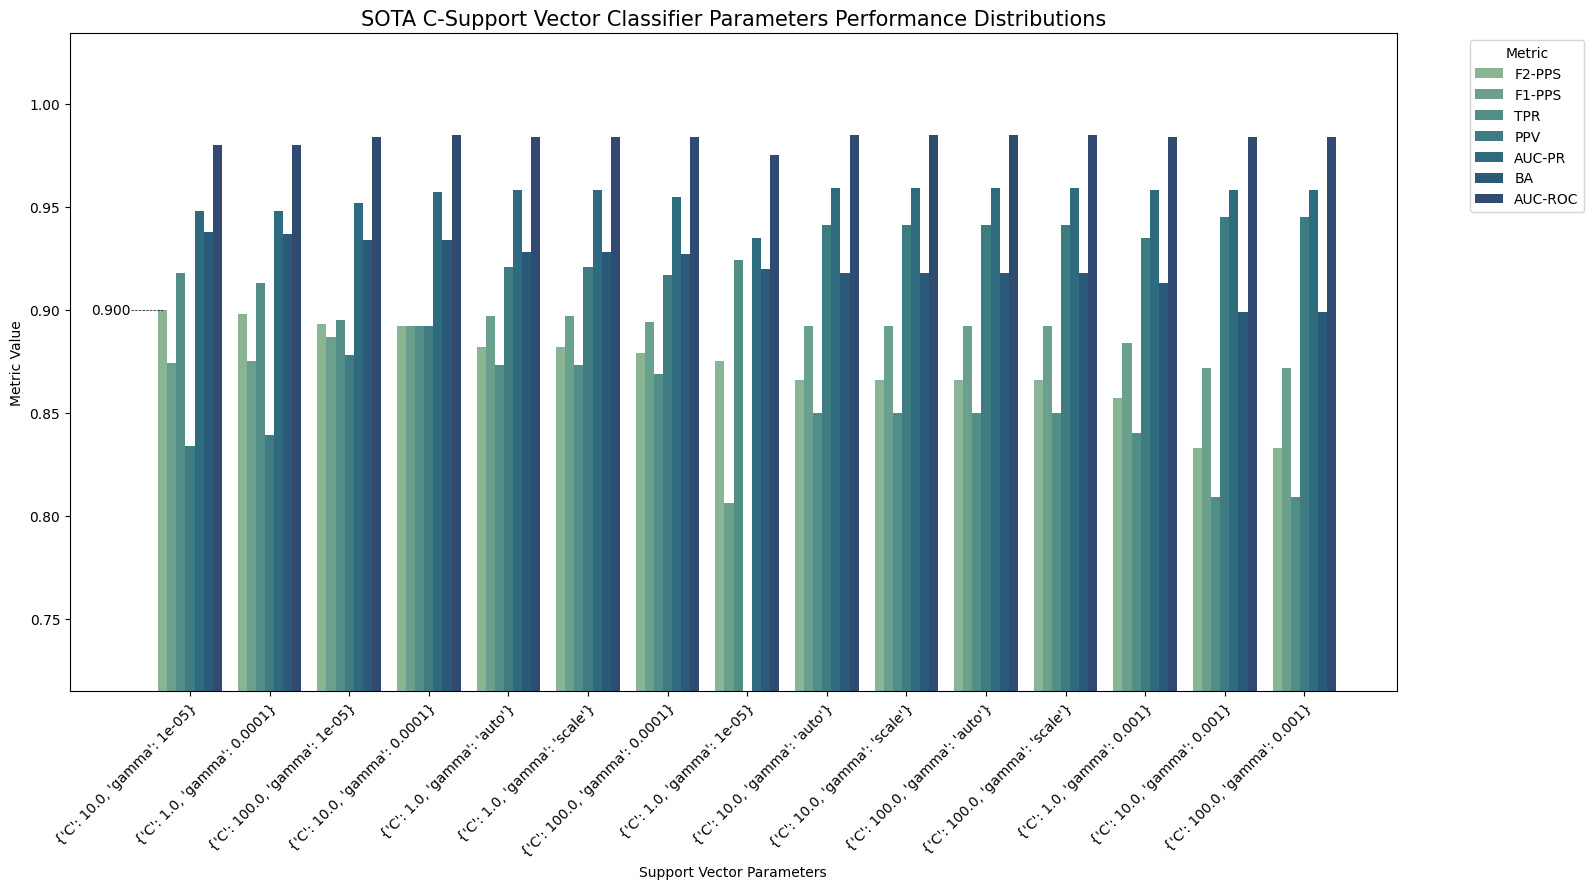

In [68]:
base = select(
    dir = os.path.join(output, f'ranks.csv'),
    title = "SOTA C-Support Vector Classifier Parameters",
    column = 'Support Vector Parameters',
    output = output,
    main = ['Support Vector Parameters'],
    order = order,
    model = None
)